In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from numerov.cy.core import radial_wf as radial_wf_cy
from numerov.core import radial_wf as radial_wf_py
from sympy.physics.hydrogen import R_nl

In [3]:
step = 0.0001
n = 10
l = 5

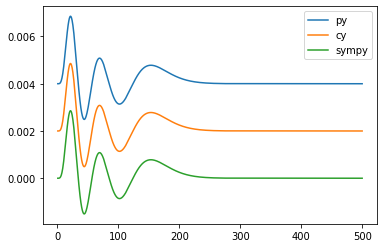

In [4]:
offset = 0.002

fig, ax = plt.subplots()

# python
r_py, y_py = radial_wf_py(n, l, step=step)
ax.plot(r_py, y_py + 2*offset, label="py")

# cython
r_cy, y_cy = radial_wf_cy(n, l, step=step)
ax.plot(r_cy, y_cy + offset, label="cy")

# sympy
y_sympy = [R_nl(n, l, r).evalf() for r in r_cy]
ax.plot(r_cy, y_sympy, label="sympy")

ax.legend()
plt.show()

In [5]:
%timeit radial_wf_py(n, l, step=step)

68.8 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit radial_wf_cy(n, l, step=step)

15 ms ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
from numerov import radial_integral as radial_integral_cy
from numerov.core import radial_integral as radial_integral_py
from sympy import integrate, oo, var

In [8]:
n1, l1 = 14, 1
n2, l2 = 13, 2

In [9]:
# python
radial_integral_py(n1, l1, n2 ,l2, step=step)

47.843559310820844

In [10]:
%timeit radial_integral_py(n2, l2, n2 ,l2, step=step)

84.7 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
# cython
radial_integral_cy(n1, l1, n2 ,l2, step=step)

47.82964250000002

TODO - why do python and cython results differ?

In [12]:
%timeit radial_integral_cy(n2, l2, n2 ,l2, step=step)

3.96 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
# sympy
var("r")
integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()

47.8295909083453

In [14]:
%timeit integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()

166 ms ± 4.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
